<a href="https://colab.research.google.com/github/SaraBabakN/hello-world/blob/master/l1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from datetime import datetime
import torch
import torchvision
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

train_set = torchvision.datasets.CIFAR10('./dataset', train=True, download=True,
                                         transform=transforms.Compose([transforms.ToTensor()]))


def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [0]:
model = torch.load('/content/drive/My Drive/data1/model.pth')
model.eval()

In [0]:
lr = 0.01
batch_size = 200
dataset_size = 50000
epoch_num = 50

In [0]:
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
optimizer = optim.Adam(network.parameters(), lr=lr)

In [67]:
correct = 0 
for batch in data_loader: 
  images , labels = batch 
  images = images.cuda() 
  labels = labels.cuda()
  preds = network(images)
  correct = correct + get_num_correct(preds, labels)

print(correct/dataset_size )


0.98526


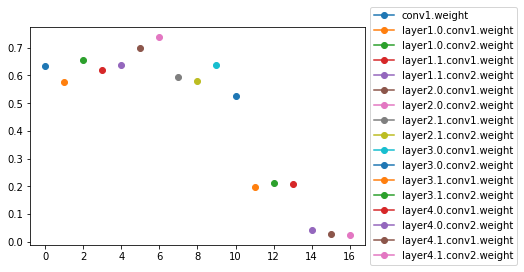

In [70]:
name_list = ['conv1.weight','layer1.0.conv1.weight','layer1.0.conv2.weight','layer1.1.conv1.weight','layer1.1.conv2.weight','layer2.0.conv1.weight','layer2.0.conv2.weight','layer2.1.conv1.weight',
'layer2.1.conv2.weight','layer3.0.conv1.weight','layer3.0.conv2.weight','layer3.1.conv1.weight','layer3.1.conv2.weight','layer4.0.conv1.weight','layer4.0.conv2.weight','layer4.1.conv1.weight','layer4.1.conv2.weight']
a = torch.zeros (17)
counter = 0 
for layer_name, parameter in network.named_parameters():
  if (layer_name in name_list):
    a[counter] = torch.sum(torch.abs(parameter.clone().detach().cpu()))/parameter.numel()
    # print(layer_name , parameter.shape ,a[counter] ,'\n')
    plt.plot(counter, a[counter] , marker = 'o', label = layer_name)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    counter = counter + 1 
   

In [0]:
new_net =  models.resnet18(num_classes=10).cuda()

In [0]:
optimizer = optim.Adam(myNet.parameters(), lr=lr)

In [142]:
for epoch in range(epoch_num):
    correct = 0 
    for batch in data_loader:
        images, labels = batch
        images = images.cuda() 
        labels = labels.cuda()
        preds = myNet(images)
          
        loss = nn.functional.cross_entropy(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct = correct + get_num_correct(preds,labels)
    print("epoch", epoch, "accuracy" , correct)


epoch 0 accuracy 22489
epoch 1 accuracy 31327
epoch 2 accuracy 35214
epoch 3 accuracy 37745
epoch 4 accuracy 39704
epoch 5 accuracy 41350
epoch 6 accuracy 42877
epoch 7 accuracy 44279
epoch 8 accuracy 45176
epoch 9 accuracy 46187
epoch 10 accuracy 47046
epoch 11 accuracy 47490
epoch 12 accuracy 47906
epoch 13 accuracy 48277
epoch 14 accuracy 48610
epoch 15 accuracy 48665
epoch 16 accuracy 48730
epoch 17 accuracy 48861
epoch 18 accuracy 49039
epoch 19 accuracy 49048
epoch 20 accuracy 49170
epoch 21 accuracy 49045
epoch 22 accuracy 49137
epoch 23 accuracy 49024
epoch 24 accuracy 49332
epoch 25 accuracy 49281
epoch 26 accuracy 49248
epoch 27 accuracy 49235
epoch 28 accuracy 49406
epoch 29 accuracy 49349
epoch 30 accuracy 49207
epoch 31 accuracy 49310
epoch 32 accuracy 49349
epoch 33 accuracy 49333
epoch 34 accuracy 49348
epoch 35 accuracy 49406
epoch 36 accuracy 49482
epoch 37 accuracy 49475
epoch 38 accuracy 49439
epoch 39 accuracy 49531
epoch 40 accuracy 49512
epoch 41 accuracy 49522
ep

In [143]:
49532/50000

0.99064

In [0]:
myNet = myResnet(num_classes=10).cuda()

In [0]:
class myModel(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(myModel, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x):
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x):
        return self._forward_impl(x)

In [0]:
def _resnet(arch, block, layers, pretrained, progress, **kwargs):
    model = myModel(block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model
def myResnet(pretrained=False, progress=True, **kwargs):
    r"""ResNet-18 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet18', BasicBlock, [2, 2, 2], pretrained, progress,
                   **kwargs)

In [0]:
def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

class BasicBlock(nn.Module):
    expansion = 1
    __constants__ = ['downsample']

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out
def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)